# Chronos - Basic Usage

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np

from chronos import Chronos

import chronos_plotting

In [ ]:
x = np.array(range(365*4))
my_df = pd.DataFrame({"ds": pd.date_range(start="2016-01-01", periods=365*4, freq='d'),
                      "y": 0.01 * x + np.sin(x/30)})
print(my_df.head())

In [ ]:
plt.figure(figsize=(15,5))
plt.scatter(my_df['ds'], my_df['y'], c="blue")
plt.show()

In [ ]:
z = my_df.index.values
dummy1 = 0.01 * z
dummy2 = np.sin(z/30)
my_df['dummy1'] = dummy1
my_df['dummy2'] = dummy2
my_df.head()

In [ ]:
my_chronos = Chronos(max_iter=1000, learning_rate=0.001, distribution='Gamma')
my_chronos.add_regressors(regressor_name="dummy1", regressor_method="add")
my_chronos.add_regressors(regressor_name="dummy2", regressor_method="add")


In [ ]:
my_chronos.fit(my_df)

In [ ]:
future_df = my_chronos.make_future_dataframe(period=365)
z = future_df.index.values
dummy1 = 0.01 * z
dummy2 = np.sin(z/30)
future_df['dummy1'] = dummy1
future_df['dummy2'] = dummy2

future_df.tail()

In [ ]:
predictions = my_chronos.predict(future_df, sample_number=1000)#, period=31)

In [ ]:
chronos_plotting.plot_components(predictions, my_chronos);

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np

In [ ]:
my_ts_data = pd.read_csv('data/prophetData.csv')
my_ts_data['ds'] = pd.to_datetime(my_ts_data['ds'])
my_ts_data.head()

In [ ]:
my_ts_data.shape

In [ ]:
plt.figure(figsize=(15,5))
plt.scatter(my_ts_data['ds'], my_ts_data['y'], c="blue")
plt.xlabel("Date", size=16)
plt.ylabel("LOG(page_views)", size=16)
plt.title(f"LOG(page view) for Peyton Manning from 2007-2016", size=20)
plt.savefig("Time Series v1 t-distribution.png", dpi=96*4)
plt.show()

In [ ]:
from chronos import Chronos
import chronos_plotting

In [ ]:
my_chronos = Chronos(method="MAP", 
                     max_iter=1000, 
                     learning_rate=0.001,
                     distribution="Normal", 
                     seasonality_mode="mul")
#my_chronos.add_regressors("dummy", regressor_method="add")
#my_ts_data["dummy"] = my_ts_data["y"].copy()

my_chronos.fit(my_ts_data)

In [ ]:
future_df = my_chronos.make_future_dataframe(period=365*2)
#future_df['dummy'] = future_df['dummy'].fillna(8.0)
future_df.tail()

In [ ]:
predictions = my_chronos.predict(future_df, sample_number=100)
predictions.head()

In [ ]:
chronos_plotting.plot_components(predictions, my_chronos);

In [ ]:
chronos_plotting.plot_components(predictions);

In [ ]:
#assert(False)

## Bike Sharing Data

Coming from Chicago: https://www.kaggle.com/yingwurenjian/chicago-divvy-bicycle-sharing-data?select=data.csv

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np

from chronos import Chronos
import chronos_plotting

In [ ]:
bike_data = pd.read_csv('data/data.csv')
bike_data.head()

In [ ]:
relevant_data = bike_data[['starttime', 'trip_id']]
relevant_data['starttime'] = pd.to_datetime(relevant_data['starttime'])
relevant_data

In [ ]:
relevant_data['date'] = relevant_data['starttime'].dt.date
relevant_data.head()

In [ ]:
grouped_data = relevant_data.groupby('date').sum().reset_index()
grouped_data.columns = ['ds', 'y']
grouped_data['ds'] = pd.to_datetime(grouped_data['ds'])
grouped_data.head()

In [ ]:
plt.figure(figsize=(15,5))
plt.scatter(grouped_data['ds'], grouped_data['y'], c="blue")
plt.xlabel("Date", size=16)
plt.ylabel("Trips", size=16)
plt.title(f"Trip Number Taken from Chicago's Divvy Bike Sharing Program", size=20)
plt.show()

In [ ]:
my_chronos = Chronos(method="MAP", max_iter=2000, 
                     learning_rate=0.01, 
                     n_changepoints=25,
                     changepoint_range=0.8,
                     changepoint_prior_scale=0.1,
                     distribution="Gamma",
                     seasonality_mode="mul")
my_chronos.fit(grouped_data)

In [ ]:
predictions = my_chronos.predict(sample_number=1000, frequency='D', ci_interval=0.95, period=365)

In [ ]:
chronos_plotting.plot_components(predictions, 
                                 my_chronos, 
                                 changepoint_threshold=0.0, 
                                 figure_name="Divvy components.png");

In [ ]:
fig = plt.figure(tight_layout=True, figsize=(15,5))
gs = gridspec.GridSpec(1, 1)
chronos_plotting.plot_predictions(predictions, fig=fig, gs_section=gs[0, :])
plt.title("Divvy Bike Sharing Modeled Using a Gamma Distribution", size=18)
plt.show();

In [ ]:
my_chronos = Chronos(method="MAP", max_iter=2000, 
                     learning_rate=0.1, 
                     n_changepoints=25,
                     changepoint_range=0.9,
                     changepoint_prior_scale=0.1,
                     distribution="Normal",
                     seasonality_mode="mul")
my_chronos.fit(grouped_data)

In [ ]:
predictions = my_chronos.predict(sample_number=1000, frequency='B', ci_interval=0.95, period=365)

In [ ]:
fig = plt.figure(tight_layout=True, figsize=(15,5))
gs = gridspec.GridSpec(1, 1)
chronos_plotting.plot_predictions(predictions, fig=fig, gs_section=gs[0, :])
plt.title("Divvy Bike Sharing Modeled Using a Normal Distribution", size=18)
plt.show();

## COVID

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from chronos import Chronos

In [33]:
covid_data = pd.read_csv('data/COVID_19_Canada.csv')
covid_data.head(2)

,pruid,prname,prnameFR,date,numconf,numprob,numdeaths,numtotal,numtested,numrecover,...,numdeaths_last14,ratedeaths_last14,numtotal_last7,ratetotal_last7,numdeaths_last7,ratedeaths_last7,avgtotal_last7,avgincidence_last7,avgdeaths_last7,avgratedeaths_last7
0,35,Ontario,Ontario,2020-01-31,3,0,0.0,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,59,British Columbia,Colombie-Britannique,2020-01-31,1,0,0.0,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
#canada_mask = covid_data['prname'] == 'British Columbia'
canada_mask = covid_data['prname'] == 'Canada'
desired_columns = ['date', 'numtoday']

canada_daily_covid = covid_data[desired_columns].loc[canada_mask]
canada_daily_covid.head()

,date,numtoday
2,2020-01-31,4
5,2020-02-08,3
8,2020-02-16,1
11,2020-02-21,1
14,2020-02-24,1


In [37]:
canada_daily_covid.rename({'date': 'ds', 'numtoday': 'y'}, axis=1, inplace=True)
canada_daily_covid['ds'] = pd.to_datetime(canada_daily_covid['ds'])
#canada_daily_covid['y'] /= canada_daily_covid['y'].max()
canada_daily_covid = canada_daily_covid[canada_daily_covid['y']> 0]
canada_daily_covid.head()


,ds,y
2,2020-01-31,4
5,2020-02-08,3
8,2020-02-16,1
11,2020-02-21,1
14,2020-02-24,1


In [38]:
canada_daily_covid['y']

2          4
5          3
8          1
11         1
14         1
        ... 
4421    8129
4436    5903
4451    5790
4466    6442
4481    7476
Name: y, Length: 310, dtype: int64

In [39]:
canada_daily_covid['ds'].dt.day_name().isin(["Sunday", "Saturday"]).sum()/canada_daily_covid['ds'].shape[0]

0.2903225806451613

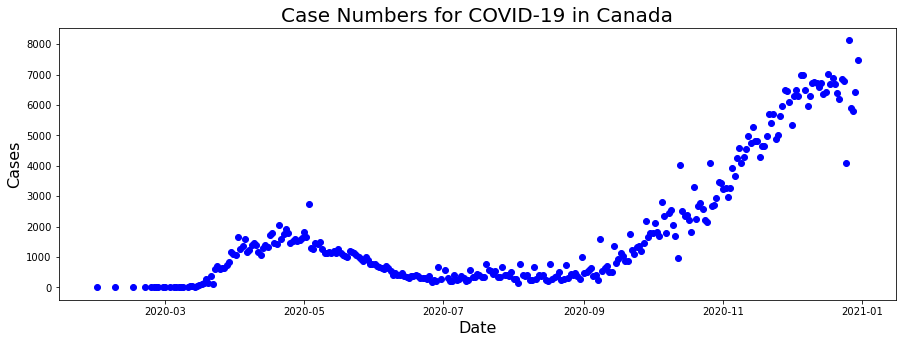

In [40]:
plt.figure(figsize=(15,5))
plt.scatter(canada_daily_covid['ds'], canada_daily_covid['y'], c="blue")
plt.xlabel("Date", size=16)
plt.ylabel("Cases", size=16)
plt.title(f"Case Numbers for COVID-19 in Canada", size=20)
plt.show()

In [41]:
my_chronos = Chronos(method="MAP", max_iter=2000, 
                     learning_rate=0.001, 
                     n_changepoints=25,
                     changepoint_range=0.9,
                     changepoint_prior_scale=10.0,
                     distribution="Gamma",
                     seasonality_mode="mul",
                     year_seasonality_order=0,
                     weekly_seasonality_order=6,
                     month_seasonality_order=0)#, weekly_seasonality_order=0, month_seasonality_order=0)
my_chronos.fit(canada_daily_covid)

Employing Maximum A Posteriori
100.0% - ELBO loss: -1.7704 | Mean Absolute Error: 213.6737                                         


In [42]:
predictions = my_chronos.predict(sample_number=1000, frequency='B', ci_interval=0.95, period=31)

/Users/borisbshabash/Documents/new_repos/Chronos/chronos_plotting.py:134: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig(figure_name, dpi=96*4)#'''
/anaconda3/envs/pyroenv/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


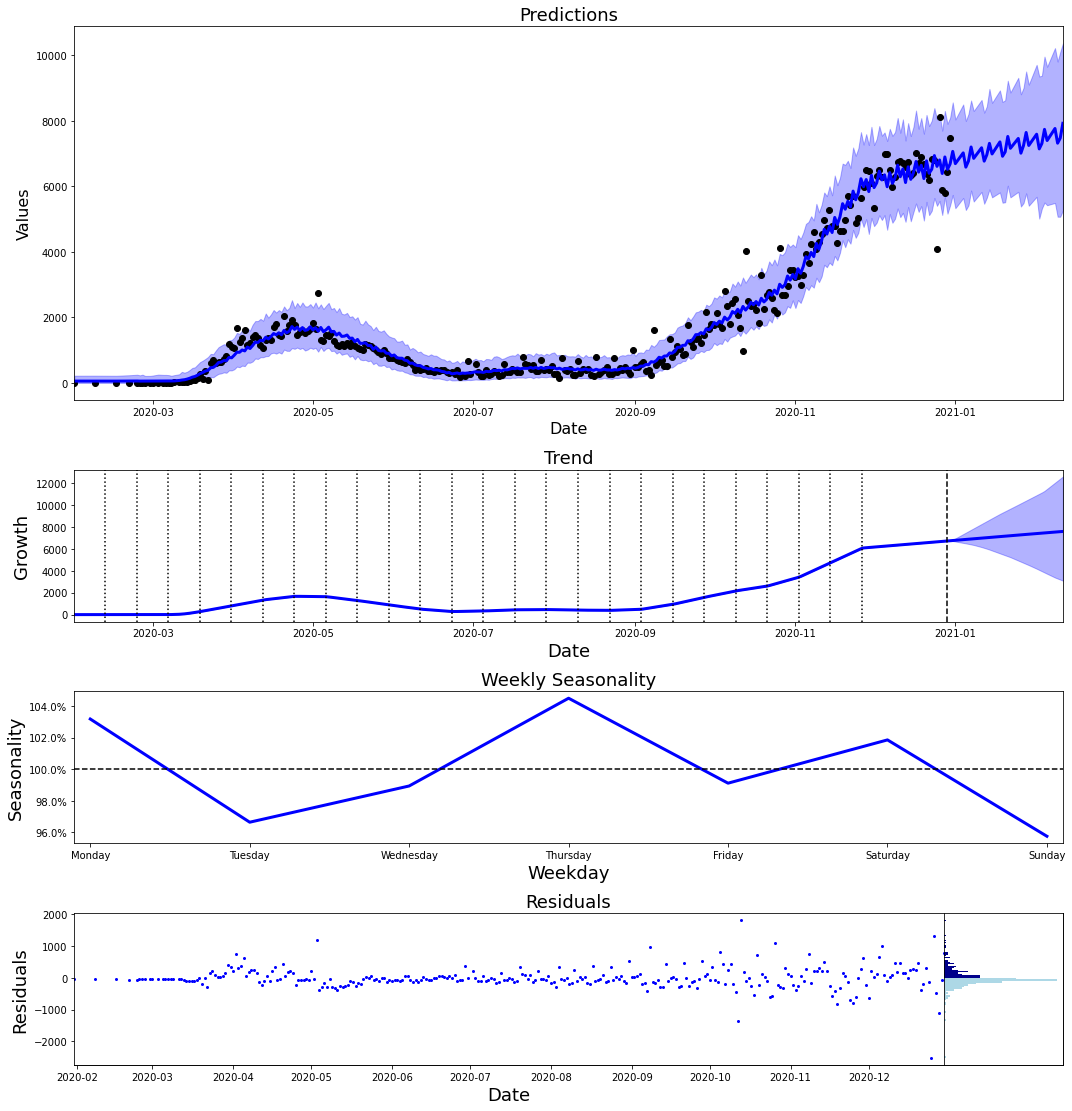

In [43]:
chronos_plotting.plot_components(predictions, my_chronos, changepoint_threshold=0.0, figure_name="COVID components.png");

## AAPL stocks

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from chronos import Chronos
import chronos_plotting

In [3]:
my_ts_data = pd.read_csv('data/AAPL.csv')
my_ts_data = my_ts_data[['Date', 'Adj Close']]
my_ts_data.columns = ['ds', 'y']
#my_ts_data['y'] = 100*my_ts_data['y'].pct_change()
#my_ts_data['y'] = np.log(my_ts_data['y']+1)
my_ts_data.dropna(inplace=True)
my_ts_data['ds'] = pd.to_datetime(my_ts_data['ds'])
#my_ts_data = my_ts_data.iloc[:-7]
my_ts_data.head()

,ds,y
0,2018-12-26,38.379425
1,2018-12-27,38.130344
2,2018-12-28,38.149883
3,2018-12-31,38.518612
4,2019-01-02,38.562561


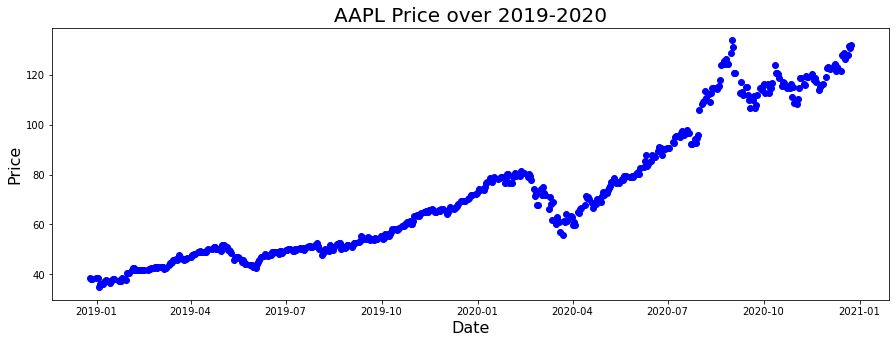

In [4]:
plt.figure(figsize=(15,5))
plt.scatter(my_ts_data['ds'], my_ts_data['y'], c="blue")
plt.xlabel("Date", size=16)
plt.ylabel("Price", size=16)
plt.title(f"AAPL Price over 2019-2020", size=20)
plt.show()

In [28]:
my_chronos = Chronos(method="MAP", max_iter=2000, 
                     learning_rate=0.1, 
                     n_changepoints=25,
                     seasonality_mode="mul",
                     changepoint_prior_scale=0.5,
                     distribution="StudentT", 
                     year_seasonality_order=0)
my_chronos.fit(my_ts_data)

No weekends found in training data, will only consider Monday - Friday
Employing Maximum A Posteriori
100.0% - ELBO loss: -2.18 | Mean Absolute Error: 2.4559                                             


In [29]:
future_df = my_chronos.make_future_dataframe(period=31, frequency='D')
future_df

,ds,y
0,2018-12-26,38.379425
1,2018-12-27,38.130344
2,2018-12-28,38.149883
3,2018-12-31,38.518612
4,2019-01-02,38.562561
...,...,...
531,2021-01-20,NaN
532,2021-01-21,NaN
533,2021-01-22,NaN
534,2021-01-23,NaN


In [30]:
predictions = my_chronos.predict(future_df, sample_number=1000)
predictions.head()

,ds,y,yhat,yhat_upper,yhat_lower,trend,trend_upper,trend_lower
0,2018-12-26,38.379425,37.876713,45.199825,27.728207,38.136883,38.136993,38.136993
1,2018-12-27,38.130344,37.980949,47.304821,30.363506,38.200806,38.201050,38.201050
2,2018-12-28,38.149883,37.711723,44.794151,30.075254,38.265488,38.265102,38.265102
3,2018-12-31,38.518612,38.165497,46.042480,29.746733,38.457619,38.457272,38.457272
4,2019-01-02,38.562561,38.796413,46.436958,31.408260,38.585068,38.585377,38.585377


/Users/borisbshabash/Documents/new_repos/Chronos/chronos_plotting.py:134: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig(figure_name, dpi=96*4)#'''
/anaconda3/envs/pyroenv/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


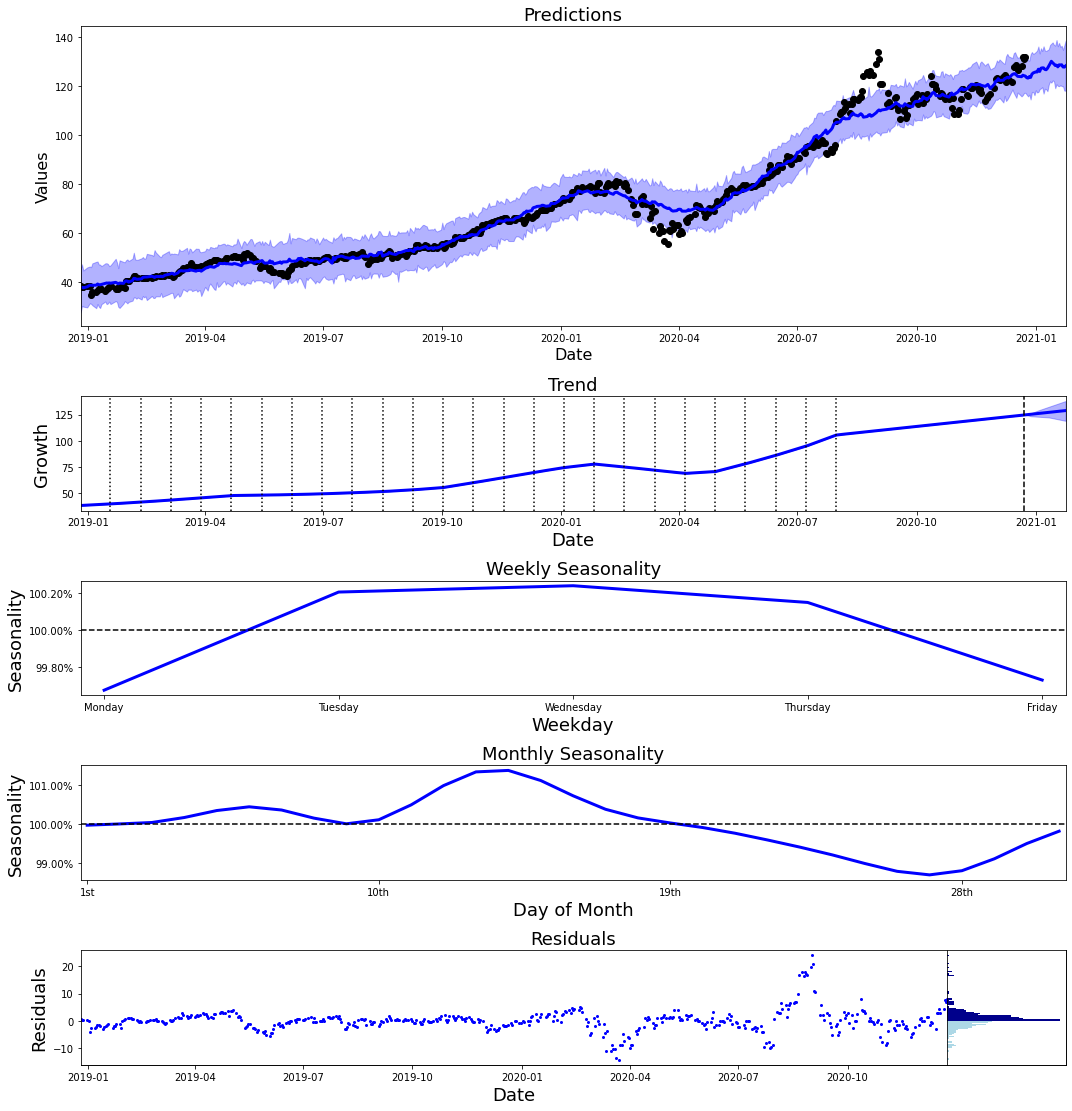

In [31]:
chronos_plotting.plot_components(predictions, my_chronos, figure_name="AAPL.png");